<a href="https://colab.research.google.com/github/qgallouedec/panda-gym/blob/colab/PickAndPlace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `panda-gym` code example

## Install `panda-gym`

In [1]:
# %pip install panda-gym
# %pip install imageio[ffmpeg]

## Interract

In [2]:
import gymnasium as gym
import panda_gym

# env = gym.make("PandaSorter-v3", render_mode="rgb_array")
env = gym.make("PandaPickAndPlace-v3", render_mode="rgb_array")
observation, info = env.reset()

images = [env.render()]
count = 0
for i in range(15):
    print(i+1)
    while count < 5:
        action = env.action_space.sample()
        observation, reward, terminated, truncated, info = env.step(action)
        images.append(env.render())
        count=count + 1
        if count%100 == 0:
            print(count)
    observation, info = env.reset()
    count = 0
    # if terminated or truncated:
    #     observation, info = env.reset()
    #     images.append(env.render())

env.close()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


## Convert into animation


In [3]:
#pip install numpngw
from numpngw import write_apng

write_apng("anim.png", images, delay=40)  # real-time rendering = 40 ms between frames

In [4]:
import imageio.v3 as iio
iio.imwrite("anim.mp4", images, fps=25)

## Show animation

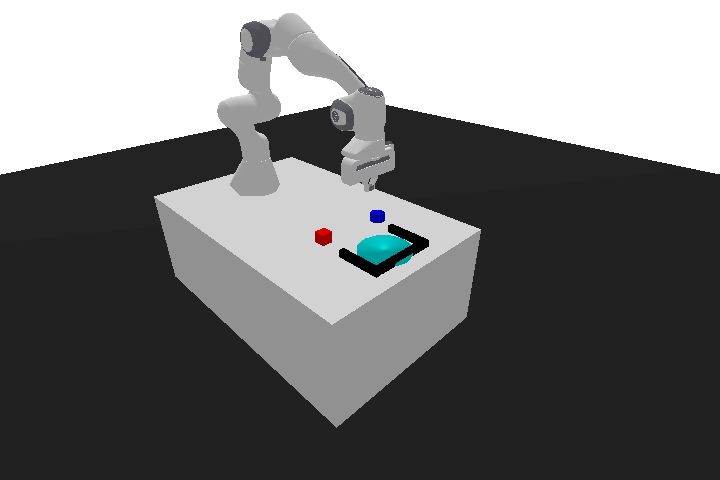

In [5]:
from IPython.display import Image

Image(filename="anim.png")